# VISUALIZATION USING MATPLOTLIB AND SEABORN

## Importing the libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [9]:
dataset= pd.read_csv("Data.csv")

In [10]:
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


## Handling missing data

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan , strategy='mean')
imputer.fit(dataset.iloc[:, 1:3])
dataset.iloc[:,1:3]=imputer.transform(dataset.iloc[:,1:3])

In [13]:
print(dataset)

   Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000  63777.777778       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  38.777778  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes


# MATPLOTLIB

## Scatter Plot

Text(0, 0.5, 'Salary')

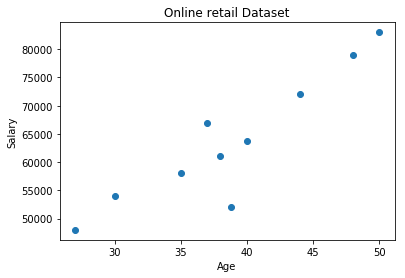

In [14]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the Age against the Salary
ax.scatter(dataset['Age'], dataset['Salary'])
# set a title and labels
ax.set_title('Online retail Dataset')
ax.set_xlabel('Age')
ax.set_ylabel('Salary')

Text(0, 0.5, 'Age')

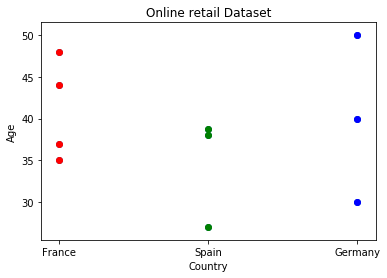

In [22]:
# create color dictionary
colors = {'France':'r', 'Spain':'g', 'Germany':'b'}

# create a figure and axis
fig, ax = plt.subplots()

# scatter the Age against the Salary
ax.scatter(dataset['Country'], dataset['Age'])

# plot each data-point
for i in range(len(dataset['Country'])):
    ax.scatter(dataset['Country'][i], dataset['Age'][i],color=colors[dataset['Country'][i]])  
    
# set a title and labels
ax.set_title('Online retail Dataset')
ax.set_xlabel('Country')
ax.set_ylabel('Age')

It is one of the most commonly used plots for simple data visualization. It gives us a representation of where each point in the entire dataset are present with respect to any 2 or 3 features. We can give the graph more meaning by coloring in each data-point by its class.To create a scatter plot in Matplotlib we can use the scatter method. We will also create a figure and an axis using plt.subplots so we can give our plot a title and labels.


## Line Chart

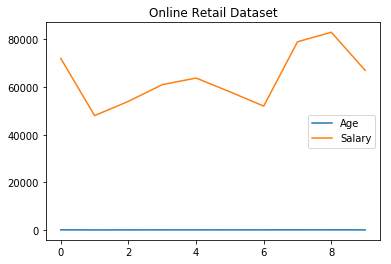

In [23]:
# get columns to plot
columns = dataset.columns.drop(['Purchased','Country'])
# create x data
x_data = range(0, dataset.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, dataset[column], label=column)
# set title and legend
ax.set_title('Online Retail Dataset')
ax.legend()

In Matplotlib we can create a line chart by calling the plot method. We can also plot multiple columns in one graph, by looping through the columns we want and plotting each column on the same axis.

## Histogram

Text(0, 0.5, 'Frequency')

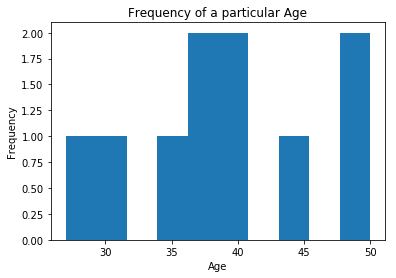

In [32]:
# get columns to plot
columns = dataset.columns.drop(['Purchased','Country'])
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(dataset['Age'])
# set title and labels
ax.set_title('Frequency of a particular Age')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

In Matplotlib we can create a Histogram using the hist method. If we pass the categorical data like the Age column from the Online retail dataset it will automatically calculate how often each class occurs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B4D044D978>,
      dtype=object)

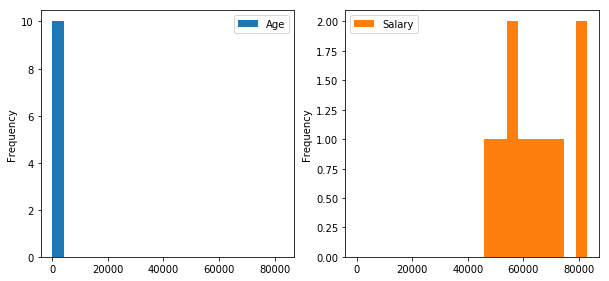

In [35]:
dataset.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

We can also create multiple histograms. The subplots argument specifies that we want a separate plot for each feature and the layout specifies the number of plots per row and column.


## Bar Chart

Text(0, 0.5, 'Frequency')

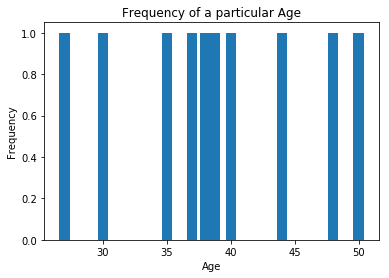

In [37]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = dataset['Age'].value_counts() 
# get x and y data 
Age = data.index 
frequency = data.values 
# create bar chart 
ax.bar(Age, frequency) 
# set title and labels 
ax.set_title('Frequency of a particular Age') 
ax.set_xlabel('Age') 
ax.set_ylabel('Frequency')

A bar chart can be created using the bar method. The bar-chart isn’t automatically calculating the frequency of a category so we are going to use pandas value_counts function to do this. The bar-chart is useful for categorical data that doesn’t have a lot of different categories (less than 30) because else it can get quite messy.

Text(0, 0.5, 'Frequency')

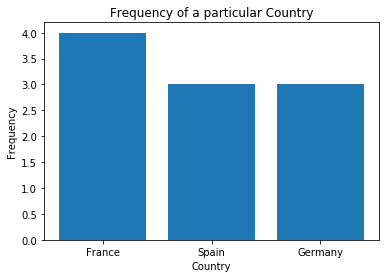

In [41]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = dataset['Country'].value_counts() 
# get x and y data 
Age = data.index 
frequency = data.values 
# create bar chart 
ax.bar(Age, frequency) 
# set title and labels 
ax.set_title('Frequency of a particular Country') 
ax.set_xlabel('Country') 
ax.set_ylabel('Frequency')

# SEABORN

## Scatter Plot

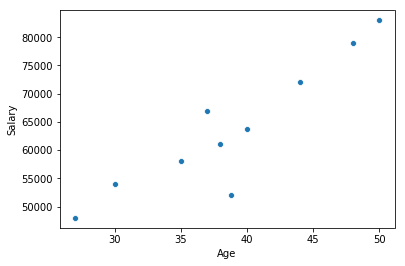

In [45]:
sns.scatterplot(x='Age', y='Salary', data=dataset)

We used the .scatterplot method for creating a scatterplot. We need to pass three arguments column names of the x and y, data.

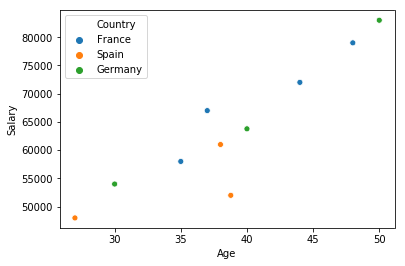

In [48]:
sns.scatterplot(x='Age', y='Salary', hue='Country', data=dataset)

We have highlighted the points by Country using the "hue" argument, which is a lot easier than in Matplotlib.

## Line Chart

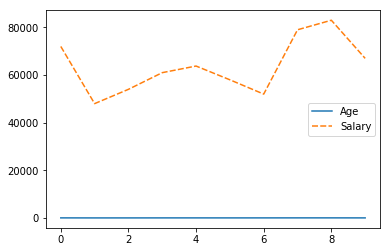

In [50]:
sns.lineplot(data=dataset.drop(['Country','Purchased'], axis=1))

## Histogram

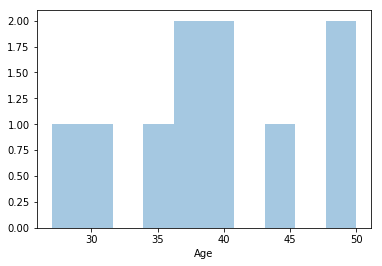

In [54]:
sns.distplot(dataset['Age'], bins=10, kde=False)

To create a histogram in Seaborn we use the sns.distplot method. We need to pass it the column we want to plot and it will calculate the occurrences itself. We can also pass it the number of bins, and if we want to plot a gaussian kernel density estimate inside the graph.

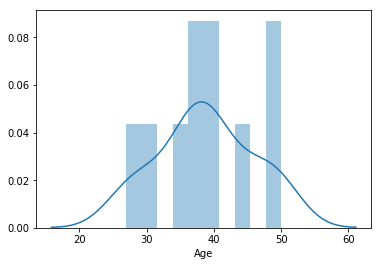

In [52]:
sns.distplot(dataset['Age'], bins=10, kde=True)

## Bar Chart

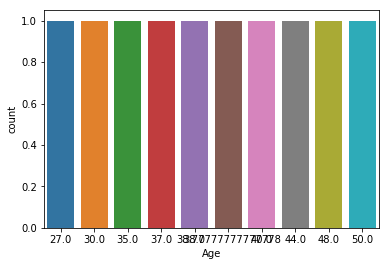

In [55]:
sns.countplot(dataset['Age'])

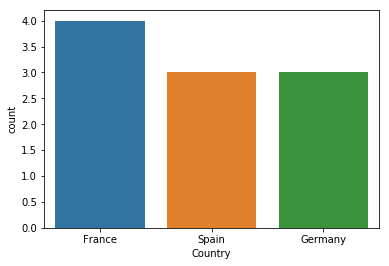

In [56]:
sns.countplot(dataset['Country'])

## Box Plot

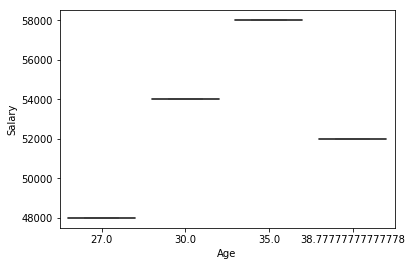

In [57]:
df = dataset[(dataset['Age']>=25) & (dataset['Salary']<60000)]
sns.boxplot('Age', 'Salary', data=df)

We have created box plots using seaborns sns.boxplot method and passing it the data as well as the x and y column name.

## Heat Map

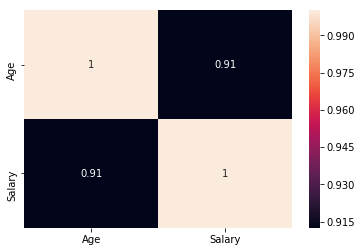

In [58]:
sns.heatmap(dataset.corr(), annot=True)

A Heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. Heatmaps are perfect for exploring the correlation of features in a dataset.
To get the correlation of the features inside a dataset we can call <dataset>.corr(), which is a Pandas dataframe method. This will give us the correlation matrix.

## Implot

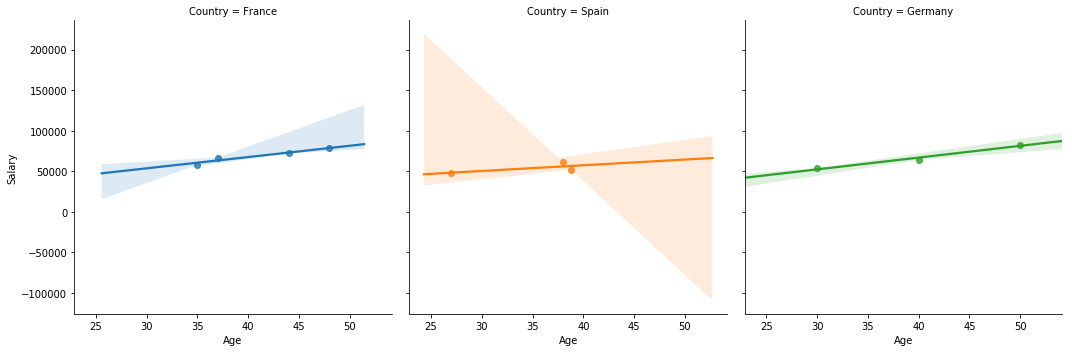

In [59]:
# This graph is same as above but plotting the species separately
sns.lmplot(x = 'Age', y = 'Salary', data = dataset, hue = 'Country', col = 'Country')

Seaborn’s lmplot is a 2D scatterplot with an optional overlaid regression line. Logistic regression for binary classification is also supported with lmplot . It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.
The fuction can draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line with a 95% confidence interval for that regression.
lmplot() has data as a required parameter and the x and y variables must be specified as strings.